In [1]:
from matplotlib import style
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import quandl

# EDA

In [2]:
from pypfopt import plotting

In [3]:
df = pd.read_csv('prices.txt', parse_dates=True, index_col="Date")

In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [5]:
df

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,...,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-02,99.91,23.80,65.66,124.47,55.28,38.34,73.51,27.15,16.16,33.42,...,36.92,35.23,23.33,26.29,36.82,33.50,38.52,47.66,36.64,10001.976
2007-01-03,99.91,23.80,65.66,124.47,55.28,38.34,73.51,27.15,16.16,33.42,...,36.92,35.23,23.33,26.29,36.82,33.50,38.52,47.66,36.64,10003.944
2007-01-04,100.12,23.18,65.60,124.68,55.95,37.81,73.32,27.06,15.99,33.34,...,36.80,35.08,23.69,26.33,36.77,33.88,38.51,47.42,36.16,10005.909
2007-01-05,100.05,23.20,65.02,123.74,54.78,36.71,72.20,26.61,15.87,32.91,...,36.49,34.96,23.50,26.14,36.11,33.69,38.25,47.01,36.50,10007.878
2007-01-08,100.11,23.22,65.26,124.14,54.86,36.97,72.30,26.53,16.27,32.95,...,36.67,35.09,23.57,26.18,36.09,33.73,38.31,47.49,36.66,10009.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30,108.24,15.21,52.17,191.40,49.20,35.50,56.79,24.83,21.17,21.75,...,22.51,62.41,47.50,50.58,46.75,68.75,81.85,31.10,41.93,10682.421
2016-12-01,107.68,15.49,52.36,191.90,48.61,35.08,56.57,24.68,20.98,21.98,...,22.90,62.82,46.52,50.25,46.38,68.25,81.89,31.29,42.05,10682.621
2016-12-02,108.02,15.60,52.28,191.74,48.77,35.12,56.71,24.74,20.74,22.13,...,22.65,62.81,46.69,50.57,46.80,68.41,81.44,32.06,42.03,10682.826


In [7]:
n_assets = len(df.columns)

# Classical models

In [8]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [9]:
train_df = df[:"2012"]
test_df = df["2012":]

## Equal weights

In [10]:
w = [1.0 / n_assets] * n_assets
equal_allocation_test = np.dot(test_df.pct_change(), w)

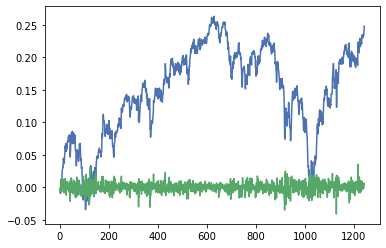

In [13]:
plt.figure()
plt.plot(equal_allocation_test[1:].cumsum())
plt.plot(equal_allocation_test[1:])
plt.show()

## Maximal Sharpe
based on histroical mean and covariance

In [14]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(train_df)
S = risk_models.sample_cov(train_df)

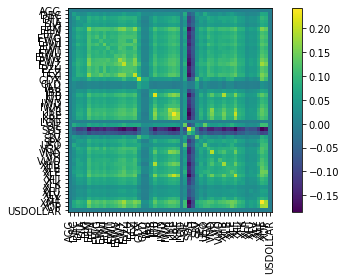

In [15]:
plotting.plot_covariance(S)

In [16]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.0), ('DBC', 0.0), ('DFE', 0.0), ('DIA', 0.0), ('DXJ', 0.0), ('EEM', 0.0), ('EFA', 0.0), ('EWG', 0.0), ('EWH', 0.0), ('EWI', 0.0), ('EWT', 0.0), ('EWU', 0.0), ('EWW', 0.0), ('EWY', 0.0), ('EWZ', 0.0), ('EZU', 0.0), ('FEZ', 0.0), ('FXI', 0.0), ('GDX', 0.0), ('GLD', 0.0219), ('IAU', 0.49613), ('IBB', 0.31901), ('ITB', 0.0), ('IVV', 0.0), ('IWD', 0.0), ('IWM', 0.0), ('IYR', 0.0), ('KBE', 0.0), ('KRE', 0.0), ('LQD', 0.04908), ('OIL', 0.0), ('SDS', 0.05766), ('SH', 0.0), ('SLV', 0.0), ('SPY', 0.0), ('USO', 0.0), ('VGK', 0.0), ('VNQ', 0.0), ('VTI', 0.0), ('VWO', 0.0), ('XHB', 0.0), ('XLB', 0.0), ('XLE', 0.0), ('XLF', 0.0), ('XLI', 0.0), ('XLK', 0.0), ('XLP', 0.05623), ('XLU', 0.0), ('XLV', 0.0), ('XLY', 0.0), ('XME', 0.0), ('XOP', 0.0), ('USDOLLAR', 0.0)])
Expected annual return: 13.0%
Annual volatility: 12.7%
Sharpe Ratio: 0.87


(0.12982621035273062, 0.12683115200612496, 0.8659245667612233)

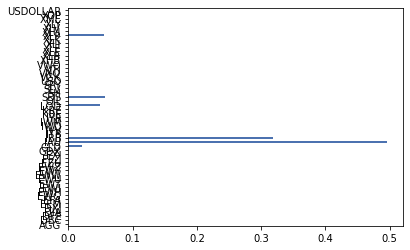

In [17]:
pd.Series(raw_weights).plot.barh();

In [18]:
w = list(raw_weights.values())
max_sharpe_test = np.dot(test_df.pct_change(), w)

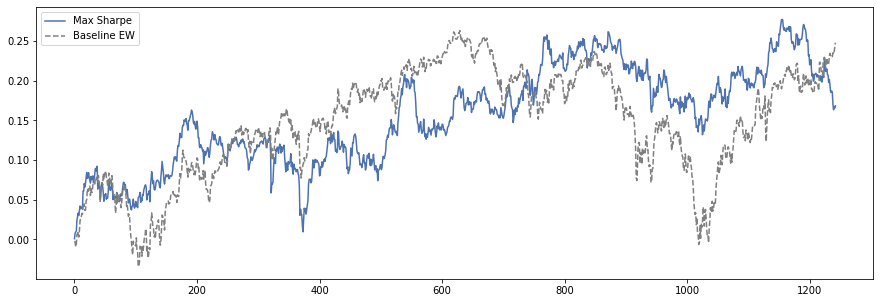

In [19]:
plt.figure(figsize = (15, 5))
plt.plot(max_sharpe_test[1:].cumsum(), label = 'Max Sharpe')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

# Minimal Variance Portfolio

In [20]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(train_df)
S = risk_models.sample_cov(train_df)

In [21]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.00046), ('DBC', 0.0), ('DFE', 0.0), ('DIA', 0.0), ('DXJ', 0.0), ('EEM', 0.0), ('EFA', 0.0), ('EWG', 0.0), ('EWH', 0.0), ('EWI', 0.0), ('EWT', 0.0), ('EWU', 0.0), ('EWW', 0.0), ('EWY', 0.0), ('EWZ', 0.0), ('EZU', 0.0), ('FEZ', 0.0), ('FXI', 0.0), ('GDX', 0.0), ('GLD', 0.0), ('IAU', 0.0), ('IBB', 0.0), ('ITB', 0.00013), ('IVV', 0.0), ('IWD', 0.0), ('IWM', 0.0), ('IYR', 0.0), ('KBE', 0.0), ('KRE', 0.0), ('LQD', 0.00018), ('OIL', 0.0), ('SDS', 0.00019), ('SH', 0.00025), ('SLV', 0.0), ('SPY', 0.0), ('USO', 0.0), ('VGK', 0.0), ('VNQ', 0.0), ('VTI', 0.0), ('VWO', 0.0), ('XHB', 0.0), ('XLB', 0.0), ('XLE', 0.0), ('XLF', 0.0), ('XLI', 0.0), ('XLK', 0.0), ('XLP', 0.0), ('XLU', 0.0), ('XLV', 0.0), ('XLY', 0.00027), ('XME', 0.0), ('XOP', 0.0), ('USDOLLAR', 0.99826)])
Expected annual return: 1.0%
Annual volatility: 0.1%
Sharpe Ratio: -9.63


(0.010163282634622859, 0.0010213057249948872, -9.631511039876317)

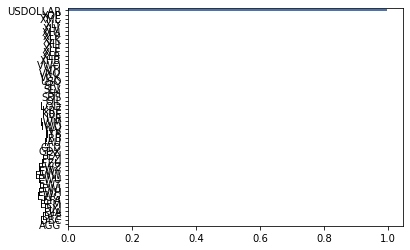

In [22]:
pd.Series(cleaned_weights).plot.barh();

In [23]:
w = list(cleaned_weights.values())
min_vol_test = np.dot(test_df.pct_change(), w)

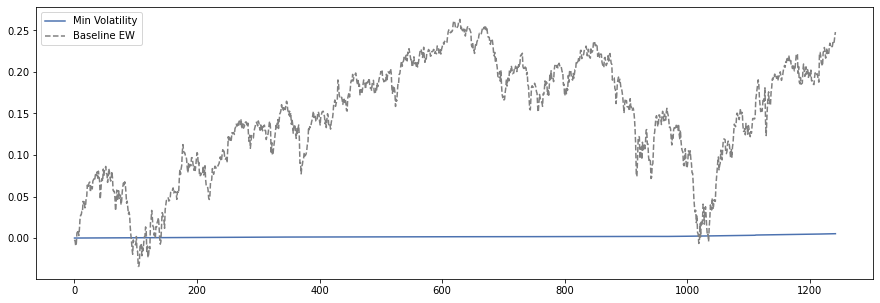

In [24]:
plt.figure(figsize = (15, 5))
plt.plot(min_vol_test[1:].cumsum(), label = 'Min Volatility')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

# Playing with the metrics

In [25]:
from mlfinlab.backtest_statistics import sharpe_ratio
from mlfinlab.backtest_statistics import probabilistic_sharpe_ratio
from mlfinlab.backtest_statistics import deflated_sharpe_ratio
from mlfinlab.backtest_statistics import information_ratio
from mlfinlab.backtest_statistics import minimum_track_record_length
from mlfinlab.backtest_statistics import drawdown_and_time_under_water

In [26]:
max_sharpe_sharpe = sharpe_ratio(max_sharpe_test[1:], entries_per_year=252)
max_sharpe_sharpe

0.3073932586874747

In [27]:
baseline_sharpe = sharpe_ratio(equal_allocation_test[1:], entries_per_year=252)
baseline_sharpe

0.4139222851872887

In [28]:
psr = probabilistic_sharpe_ratio(max_sharpe_sharpe, baseline_sharpe, len(max_sharpe_test[1:]))
psr

0.0001219243015328532

In [31]:
dsr = deflated_sharpe_ratio(max_sharpe_sharpe, [0.3, 0.4, 0.1, 0.8], len(max_sharpe_test[1:]))
dsr

0.9112294459223917

In [32]:
ir = information_ratio(max_sharpe_test[1:], benchmark=np.mean(equal_allocation_test[1:]), entries_per_year=252)
ir

-0.14532318653251838

In [33]:
mtrl = minimum_track_record_length(max_sharpe_sharpe, baseline_sharpe)
mtrl

250.67037877457616

In [34]:
df_for_ddn = pd.DataFrame.from_dict({'Date': test_df.index, 'Performance': max_sharpe_test})
df_for_ddn = df_for_ddn.set_index('Date')
drawdown, tuw = drawdown_and_time_under_water(
    df_for_ddn['Performance'][1:].cumsum(), 
    dollars=False
)

In [35]:
print('The 95th percentile of Drawdown is' , drawdown.quantile(.95))

The 95th percentile of Drawdown is 0.5816860429457024


In [36]:
print('The 95th percentile of Time under water' , tuw.quantile(.95))

The 95th percentile of Time under water 1.0766819304982298


# Maximal Sharpe: fixing it

In [37]:
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import objective_functions

In [53]:
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(train_df)
S = CovarianceShrinkage(train_df).ledoit_wolf()

In [54]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=10)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.0), ('DBC', 0.01137), ('DFE', 0.01833), ('DIA', 0.01651), ('DXJ', 0.0143), ('EEM', 0.0291), ('EFA', 0.02217), ('EWG', 0.02424), ('EWH', 0.02199), ('EWI', 0.02543), ('EWT', 0.02113), ('EWU', 0.0223), ('EWW', 0.02375), ('EWY', 0.02793), ('EWZ', 0.03055), ('EZU', 0.02512), ('FEZ', 0.02562), ('FXI', 0.02956), ('GDX', 0.01929), ('GLD', 0.00419), ('IAU', 0.00407), ('IBB', 0.01398), ('ITB', 0.02654), ('IVV', 0.01801), ('IWD', 0.01942), ('IWM', 0.02174), ('IYR', 0.02703), ('KBE', 0.02874), ('KRE', 0.02526), ('LQD', 0.00105), ('OIL', 0.01752), ('SDS', 0.0), ('SH', 0.0), ('SLV', 0.01222), ('SPY', 0.01838), ('USO', 0.01723), ('VGK', 0.02358), ('VNQ', 0.02403), ('VTI', 0.01854), ('VWO', 0.02142), ('XHB', 0.02448), ('XLB', 0.02199), ('XLE', 0.02439), ('XLF', 0.02849), ('XLI', 0.01875), ('XLK', 0.01694), ('XLP', 0.00932), ('XLU', 0.0123), ('XLV', 0.01141), ('XLY', 0.01824), ('XME', 0.03336), ('XOP', 0.02867), ('USDOLLAR', 0.0)])
Expected annual return: 5.3%
Annual volatility: 

/anaconda2/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:182: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


(0.052669578783101016, 0.2924510323550364, 0.11170956901748959)

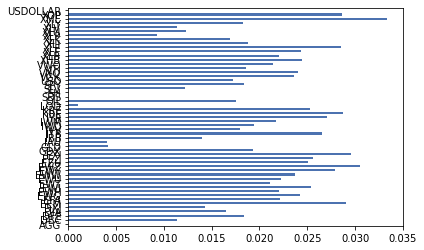

In [55]:
pd.Series(cleaned_weights).plot.barh();

In [56]:
w = list(cleaned_weights.values())
max_sharpe_test_fixed = np.dot(test_df.pct_change(), w)

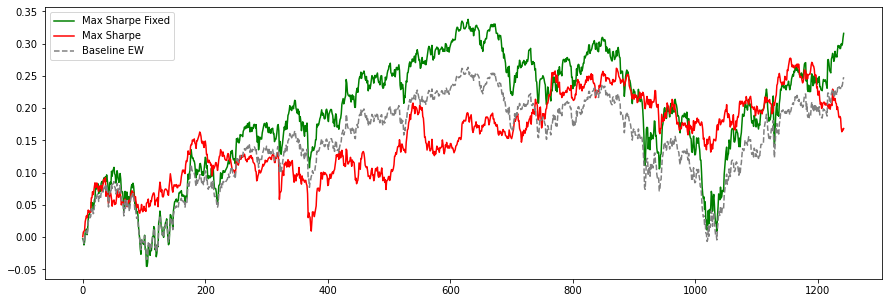

In [57]:
plt.figure(figsize = (15, 5))
plt.plot(max_sharpe_test_fixed[1:].cumsum(), label = 'Max Sharpe Fixed', color = 'green')
plt.plot(max_sharpe_test[1:].cumsum(), label = 'Max Sharpe', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [60]:
msr = sharpe_ratio(max_sharpe_test[1:], entries_per_year=252)
msr_fixed = sharpe_ratio(max_sharpe_test_fixed[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(msr_fixed, msr, len(max_sharpe_test[1:]))
ir = information_ratio(max_sharpe_test_fixed[1:], benchmark=np.mean(max_sharpe_test[1:]), entries_per_year=252)
msr, msr_fixed, psr, ir

(0.3073932586874747,
 0.4223924598577099,
 0.9999484745781746,
 0.1972160435751524)

In [61]:
ea_sr = sharpe_ratio(equal_allocation_test[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(msr_fixed, ea_sr, len(max_sharpe_test[1:]))
ir = information_ratio(max_sharpe_test_fixed[1:], benchmark=np.mean(equal_allocation_test[1:]), entries_per_year=252)
ea_sr, msr_fixed, psr, ir

(0.4139222851872887,
 0.4223924598577099,
 0.6125689543086761,
 0.09076167796584067)

# Efficient Return

In [95]:
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(train_df)
S = CovarianceShrinkage(train_df).ledoit_wolf()

In [98]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=10)
raw_weights = ef.efficient_return(max(mu))
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.0), ('DBC', 0.0), ('DFE', 0.0), ('DIA', 0.0), ('DXJ', 0.0), ('EEM', 0.0), ('EFA', 0.0), ('EWG', 0.0), ('EWH', 0.0), ('EWI', 0.0), ('EWT', 0.0), ('EWU', 0.0), ('EWW', 0.0), ('EWY', 0.0), ('EWZ', 0.0), ('EZU', 0.0), ('FEZ', 0.0), ('FXI', 0.0), ('GDX', 0.0), ('GLD', 0.0), ('IAU', 0.0), ('IBB', 0.0), ('ITB', 0.0), ('IVV', 0.0), ('IWD', 0.0), ('IWM', 0.0), ('IYR', 0.0), ('KBE', 0.0), ('KRE', 0.0), ('LQD', 0.0), ('OIL', 0.0), ('SDS', 0.0), ('SH', 0.0), ('SLV', 0.0), ('SPY', 0.0), ('USO', 0.0), ('VGK', 0.0), ('VNQ', 0.0), ('VTI', 0.0), ('VWO', 0.0), ('XHB', 0.0), ('XLB', 0.0), ('XLE', 0.0), ('XLF', 0.0), ('XLI', 0.0), ('XLK', 0.0), ('XLP', 0.0), ('XLU', 0.0), ('XLV', 0.0), ('XLY', 0.0), ('XME', 1.0), ('XOP', 0.0), ('USDOLLAR', 0.0)])
Expected annual return: 6.8%
Annual volatility: 48.9%
Sharpe Ratio: 0.10


(0.06755494091458035, 0.4893792434926162, 0.0971740047150117)

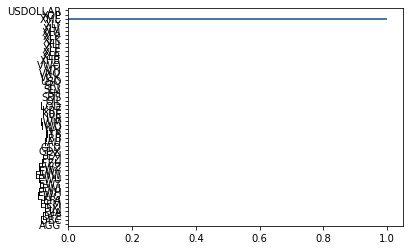

In [99]:
pd.Series(cleaned_weights).plot.barh();

In [100]:
w = list(cleaned_weights.values())
max_return = np.dot(test_df.pct_change(), w)

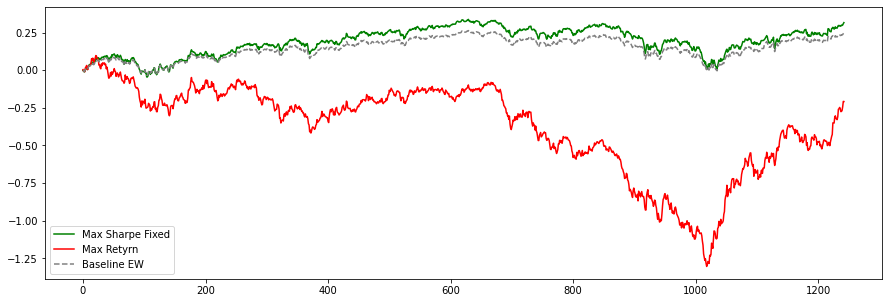

In [101]:
plt.figure(figsize = (15, 5))
plt.plot(max_sharpe_test_fixed[1:].cumsum(), label = 'Max Sharpe Fixed', color = 'green')
plt.plot(max_return[1:].cumsum(), label = 'Max Retyrn', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

# Implementing custom objectives

In [62]:
import cvxpy as cp

In [63]:
def decorrelate(weights, corr_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(corr_matrix, weights)))

In [64]:
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(train_df)
S = CovarianceShrinkage(train_df).ledoit_wolf()

In [65]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)
ef.nonconvex_objective(decorrelate, train_df.corr())
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.09734), ('DBC', 0.0), ('DFE', 0.0), ('DIA', 0.0), ('DXJ', 0.12629), ('EEM', 0.0), ('EFA', 0.0), ('EWG', 0.0), ('EWH', 0.0), ('EWI', 0.0), ('EWT', 0.0), ('EWU', 0.0), ('EWW', 0.0), ('EWY', 0.0), ('EWZ', 0.0), ('EZU', 0.0), ('FEZ', 0.0), ('FXI', 0.00472), ('GDX', 0.02802), ('GLD', 0.06777), ('IAU', 0.06069), ('IBB', 0.0), ('ITB', 0.16861), ('IVV', 0.0), ('IWD', 0.0), ('IWM', 0.0), ('IYR', 0.0), ('KBE', 0.01417), ('KRE', 0.0), ('LQD', 0.0), ('OIL', 0.0), ('SDS', 0.0), ('SH', 0.22576), ('SLV', 0.0), ('SPY', 0.0), ('USO', 0.0), ('VGK', 0.0), ('VNQ', 0.0), ('VTI', 0.0), ('VWO', 0.0), ('XHB', 0.0), ('XLB', 0.0), ('XLE', 0.0), ('XLF', 0.0), ('XLI', 0.0), ('XLK', 0.0), ('XLP', 0.0), ('XLU', 0.0), ('XLV', 0.0), ('XLY', 0.0), ('XME', 0.0), ('XOP', 0.0), ('USDOLLAR', 0.20663)])
Expected annual return: 2.5%
Annual volatility: 7.8%
Sharpe Ratio: 0.07


(0.02534175151331385, 0.07823540732385292, 0.06827792806397545)

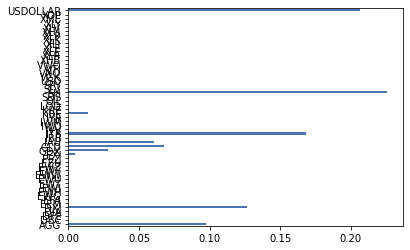

In [66]:
pd.Series(cleaned_weights).plot.barh();

In [67]:
w = list(cleaned_weights.values())
max_decorr_test = np.dot(test_df.pct_change(), w)

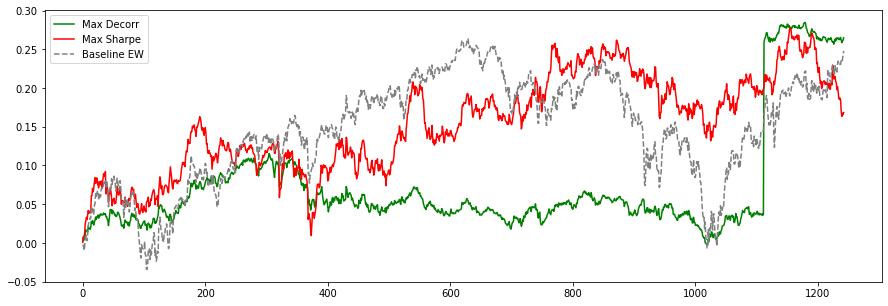

In [68]:
plt.figure(figsize = (15, 5))
plt.plot(max_decorr_test[1:].cumsum(), label = 'Max Decorr', color = 'green')
plt.plot(max_sharpe_test[1:].cumsum(), label = 'Max Sharpe', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [69]:
def deviation_risk_parity(w, cov_matrix):
    diff = w * np.dot(cov_matrix, w) - (w * np.dot(cov_matrix, w)).reshape(-1, 1)
    return (diff ** 2).sum().sum()

In [70]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.15444), ('DBC', 0.01688), ('DFE', 0.0102), ('DIA', 0.01071), ('DXJ', 0.01189), ('EEM', 0.0061), ('EFA', 0.00839), ('EWG', 0.00754), ('EWH', 0.00882), ('EWI', 0.00709), ('EWT', 0.00938), ('EWU', 0.0084), ('EWW', 0.00773), ('EWY', 0.00648), ('EWZ', 0.0057), ('EZU', 0.00716), ('FEZ', 0.00702), ('FXI', 0.00603), ('GDX', 0.00867), ('GLD', 0.03842), ('IAU', 0.0409), ('IBB', 0.01363), ('ITB', 0.00706), ('IVV', 0.01057), ('IWD', 0.01033), ('IWM', 0.00928), ('IYR', 0.00691), ('KBE', 0.00647), ('KRE', 0.00756), ('LQD', 0.17473), ('OIL', 0.01069), ('SDS', 0.0), ('SH', 0.0), ('SLV', 0.01051), ('SPY', 0.01041), ('USO', 0.01066), ('VGK', 0.00775), ('VNQ', 0.00815), ('VTI', 0.01047), ('VWO', 0.00968), ('XHB', 0.00785), ('XLB', 0.00873), ('XLE', 0.00738), ('XLF', 0.0065), ('XLI', 0.01066), ('XLK', 0.01078), ('XLP', 0.01934), ('XLU', 0.01646), ('XLV', 0.01797), ('XLY', 0.01101), ('XME', 0.00522), ('XOP', 0.00609), ('USDOLLAR', 0.15921)])
Expected annual return: 3.3%
Annual volati

(0.03277792651244353, 0.11769285433292201, 0.10857011315485773)

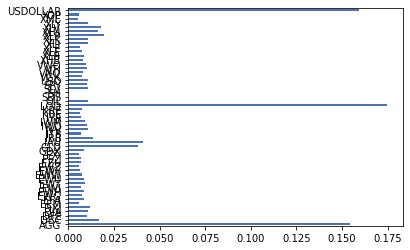

In [71]:
pd.Series(cleaned_weights).plot.barh();

In [72]:
w = list(cleaned_weights.values())
risk_parity_test = np.dot(test_df.pct_change(), w)

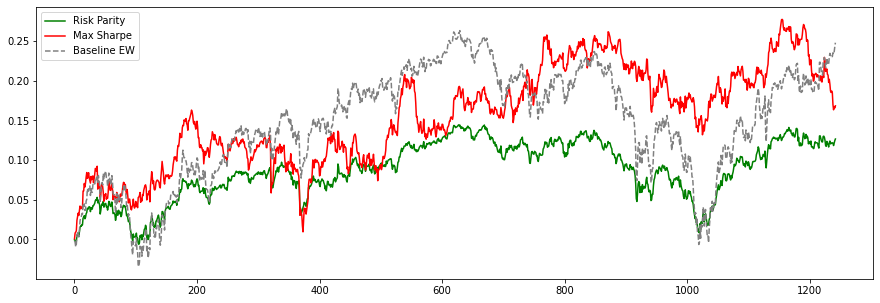

In [73]:
plt.figure(figsize = (15, 5))
plt.plot(risk_parity_test[1:].cumsum(), label = 'Risk Parity', color = 'green')
plt.plot(max_sharpe_test[1:].cumsum(), label = 'Max Sharpe', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [74]:
msr = sharpe_ratio(max_sharpe_test[1:], entries_per_year=252)
risk_parity = sharpe_ratio(risk_parity_test[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(risk_parity, msr, len(max_sharpe_test[1:]))
ir = information_ratio(risk_parity_test[1:], benchmark=np.mean(max_sharpe_test[1:]), entries_per_year=252)
msr, risk_parity, psr, ir

(0.3073932586874747,
 0.39945854048211094,
 0.9991030802384421,
 -0.13211648180330876)

# Shorting

In [75]:
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(train_df)
S = CovarianceShrinkage(train_df).ledoit_wolf()

In [76]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.add_objective(objective_functions.L2_reg, gamma=10)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', -0.00054), ('DBC', 0.01206), ('DFE', 0.01938), ('DIA', 0.0174), ('DXJ', 0.01509), ('EEM', 0.03075), ('EFA', 0.02341), ('EWG', 0.0256), ('EWH', 0.02322), ('EWI', 0.02687), ('EWT', 0.02233), ('EWU', 0.02356), ('EWW', 0.02508), ('EWY', 0.02951), ('EWZ', 0.03228), ('EZU', 0.02653), ('FEZ', 0.02706), ('FXI', 0.03123), ('GDX', 0.02048), ('GLD', 0.0045), ('IAU', 0.00437), ('IBB', 0.01473), ('ITB', 0.028), ('IVV', 0.01899), ('IWD', 0.02048), ('IWM', 0.02294), ('IYR', 0.02852), ('KBE', 0.0303), ('KRE', 0.02663), ('LQD', 0.00111), ('OIL', 0.01858), ('SDS', -0.03661), ('SH', -0.019), ('SLV', 0.01302), ('SPY', 0.01938), ('USO', 0.01827), ('VGK', 0.0249), ('VNQ', 0.02536), ('VTI', 0.01955), ('VWO', 0.02265), ('XHB', 0.02581), ('XLB', 0.02322), ('XLE', 0.02575), ('XLF', 0.03003), ('XLI', 0.01977), ('XLK', 0.01786), ('XLP', 0.00982), ('XLU', 0.01297), ('XLV', 0.01202), ('XLY', 0.01922), ('XME', 0.03526), ('XOP', 0.03029), ('USDOLLAR', 0.0)])
Expected annual return: 5.7%
Annual vo

/anaconda2/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:182: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


(0.056817035698756665, 0.3298288689821524, 0.11162466103216967)

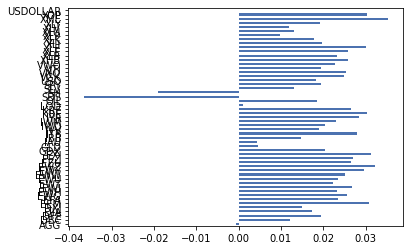

In [77]:
pd.Series(cleaned_weights).plot.barh();

In [78]:
w = list(cleaned_weights.values())

In [79]:
sum(np.abs(w))

1.11229

In [80]:
w /= sum(np.abs(w))

In [81]:
sum(np.abs(w))

0.9999999999999999

In [82]:
max_sharpe_test_short = np.dot(test_df.pct_change(), w)

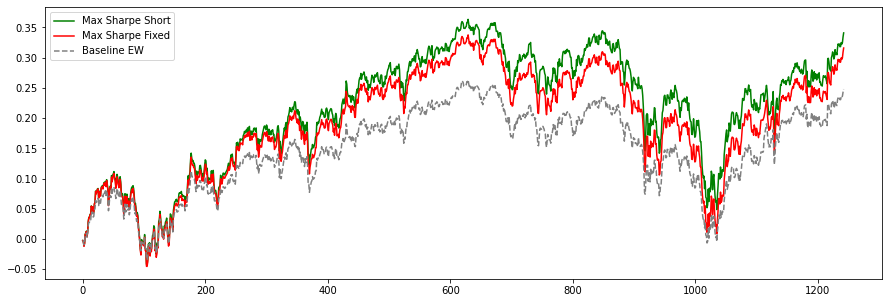

In [83]:
plt.figure(figsize = (15, 5))
plt.plot(max_sharpe_test_short[1:].cumsum(), label = 'Max Sharpe Short', color = 'green')
plt.plot(max_sharpe_test_fixed[1:].cumsum(), label = 'Max Sharpe Fixed', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [84]:
msr_short = sharpe_ratio(max_sharpe_test_short[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(msr_short, msr_fixed, len(max_sharpe_test[1:]))
ir = information_ratio(max_sharpe_test_short[1:], benchmark=np.mean(max_sharpe_test_fixed[1:]), entries_per_year=252)
msr, risk_parity, psr, ir

(0.3073932586874747,
 0.39945854048211094,
 0.8171625841452301,
 0.032952824629112996)

# More on risk and returns estimators

In [85]:
from mlfinlab.portfolio_optimization import RiskEstimators, ReturnsEstimators

In [86]:
risk_estimators = RiskEstimators()
returns_estimators = ReturnsEstimators()

In [87]:
# Finding the Semi-Covariance on price data
semi_cov = risk_estimators.semi_covariance(train_df, price_data=True, threshold_return=0)

In [88]:
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(train_df)
S = semi_cov

In [89]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.add_objective(objective_functions.L2_reg, gamma=10)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', -0.00058), ('DBC', 0.01181), ('DFE', 0.01932), ('DIA', 0.0175), ('DXJ', 0.01508), ('EEM', 0.03081), ('EFA', 0.02342), ('EWG', 0.02559), ('EWH', 0.0233), ('EWI', 0.02685), ('EWT', 0.02238), ('EWU', 0.02356), ('EWW', 0.02514), ('EWY', 0.02958), ('EWZ', 0.03229), ('EZU', 0.02653), ('FEZ', 0.02707), ('FXI', 0.03134), ('GDX', 0.0199), ('GLD', 0.0041), ('IAU', 0.00397), ('IBB', 0.01479), ('ITB', 0.02829), ('IVV', 0.01911), ('IWD', 0.0206), ('IWM', 0.02307), ('IYR', 0.02878), ('KBE', 0.03069), ('KRE', 0.02691), ('LQD', 0.00108), ('OIL', 0.01823), ('SDS', -0.03691), ('SH', -0.01916), ('SLV', 0.01237), ('SPY', 0.01949), ('USO', 0.01793), ('VGK', 0.02491), ('VNQ', 0.02556), ('VTI', 0.01965), ('VWO', 0.02266), ('XHB', 0.02607), ('XLB', 0.02323), ('XLE', 0.02573), ('XLF', 0.03039), ('XLI', 0.01987), ('XLK', 0.01797), ('XLP', 0.00988), ('XLU', 0.013), ('XLV', 0.01207), ('XLY', 0.01938), ('XME', 0.03519), ('XOP', 0.03023), ('USDOLLAR', 0.0)])
Expected annual return: 5.7%
Annual 

/anaconda2/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:182: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


(0.05690254683737775, 0.001986567271279467, 18.57603685054688)

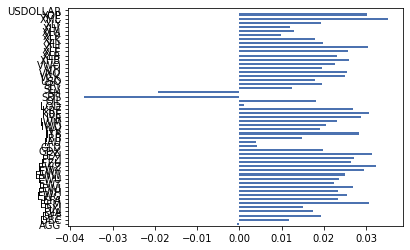

In [90]:
pd.Series(cleaned_weights).plot.barh();

In [91]:
w = list(cleaned_weights.values())
w /= sum(np.abs(w))

In [92]:
max_sharpe_test_short_semicov = np.dot(test_df.pct_change(), w)

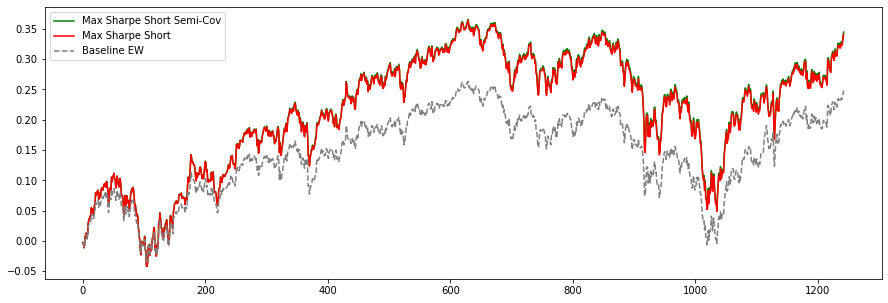

In [93]:
plt.figure(figsize = (15, 5))
plt.plot(max_sharpe_test_short_semicov[1:].cumsum(), label = 'Max Sharpe Short Semi-Cov', color = 'green')
plt.plot(max_sharpe_test_short[1:].cumsum(), label = 'Max Sharpe Short', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [94]:
msr_short_semicov = sharpe_ratio(max_sharpe_test_short_semicov[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(msr_short_semicov, msr_fixed, len(max_sharpe_test[1:]))
ir = information_ratio(max_sharpe_test_short_semicov[1:], benchmark=np.mean(max_sharpe_test_short[1:]), entries_per_year=252)
msr_short, msr_short_semicov, psr, ir

(0.4493252395084961,
 0.4537911558093132,
 0.8539759196372112,
 0.0047419759376557)

# Machine Learning Methods

## HRP

Supported Risk Measures
The HERC implementation provided through MlFinLab currently supports the following metrics for calculating weight allocations:

- 'variance': The variance of the clusters is used as a risk metric
- 'standard_deviation': The standard deviation of the clusters is used as a risk metric
- 'equal_weighting': All clusters are weighted equally with respect to the risk
- 'expected_shortfall': The expected shortfall of the clusters is used as a risk metric
- 'conditional_drawdown_risk': The conditional drawdown at risk of the clusters is used as a risk metric

In [102]:
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution

In [103]:
S = CovarianceShrinkage(train_df).ledoit_wolf()
mu = expected_returns.capm_return(train_df)

In [105]:
hrp = HierarchicalEqualRiskContribution()
hrp.allocate(asset_prices=train_df, 
             risk_measure='standard_deviation',
             covariance_matrix=S)
hrp_weights = hrp.weights.sort_values(by=0, ascending=False, axis=1)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [75.0, 75.0, 85.0, 85.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [105.0, 105.0, 124.375, 124.375],
  [95.0, 95.0, 114.6875, 114.6875],
  [80.0, 80.0, 104.84375, 104.84375],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [92.421875, 92.421875, 180.0, 180.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [245.0, 245.0, 270.0, 270.0],
  [235.0, 235.0, 257.5, 257.5],
  [225.0, 225.0, 246.25, 246.25],
  [215.0, 215.0, 235.625, 235.625],
  [205.0, 205.0, 225.3125, 225.3125],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [300.0, 300.0, 330.0

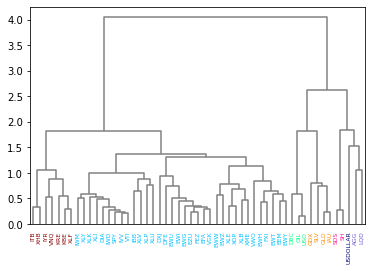

In [106]:
hrp.plot_clusters(assets=train_df.columns)

In [107]:
w = hrp_weights.T.values.flatten()

In [108]:
sum(np.abs(w))

0.9999999999999998

In [109]:
hrp_test = np.dot(test_df.pct_change(), w)

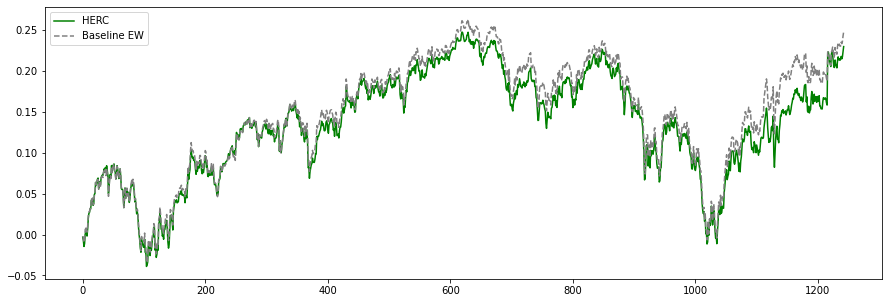

In [110]:
plt.figure(figsize = (15, 5))
plt.plot(hrp_test[1:].cumsum(), label = 'HERC', color = 'green')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [111]:
sr_hrp = sharpe_ratio(hrp_test[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(sr_hrp, baseline_sharpe, len(max_sharpe_test[1:]))
ir = information_ratio(hrp_test[1:], benchmark=np.mean(equal_allocation_test[1:]), entries_per_year=252)
baseline_sharpe, sr_hrp, psr, ir

(0.4139222851872887,
 0.3870506520286133,
 0.18051113125305196,
 -0.030398652559703587)

# PCA portfolios

In [112]:
from sklearn.decomposition import PCA
from pypfopt.risk_models import risk_matrix

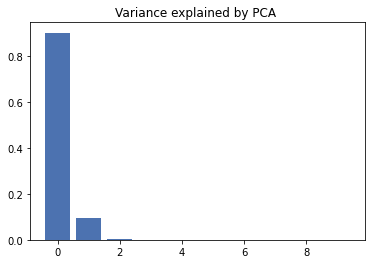

[9.02031863e-01 9.59634928e-02 1.69036769e-03 2.64602439e-04
 3.67893611e-05 8.93411048e-06 2.00080618e-06 1.06873633e-06
 4.58670943e-07 1.42151797e-07]


In [113]:
C = 10
pca = PCA(C)

V = train_df.cov()
returns_train_pca = pca.fit_transform(V)

plt.figure()
plt.bar(range(C), pca.explained_variance_ratio_)
plt.title('Variance explained by PCA ')
plt.show()

print(pca.explained_variance_ratio_)

In [114]:
# get the Principal components
pcs = pca.components_

pca_portfolios = []
for i in range(0, C):
    w = pcs[i, :]
    w = w / sum(np.abs(w))
    pca_portfolios.append(w)

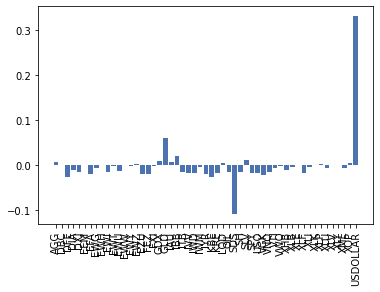

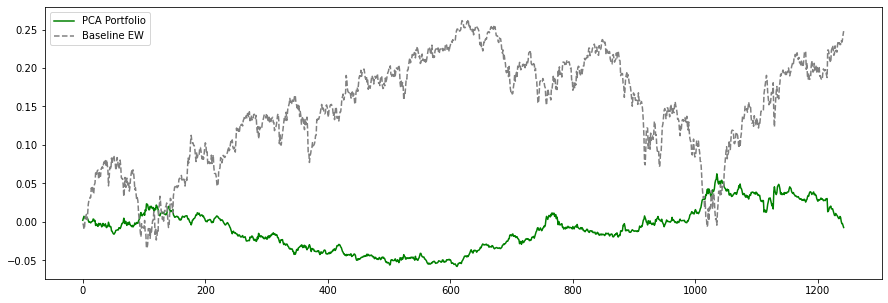

--------------------


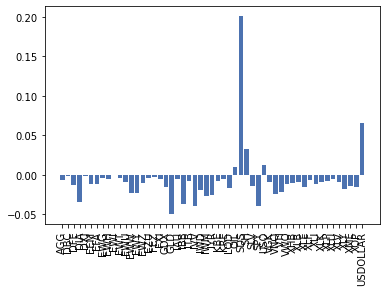

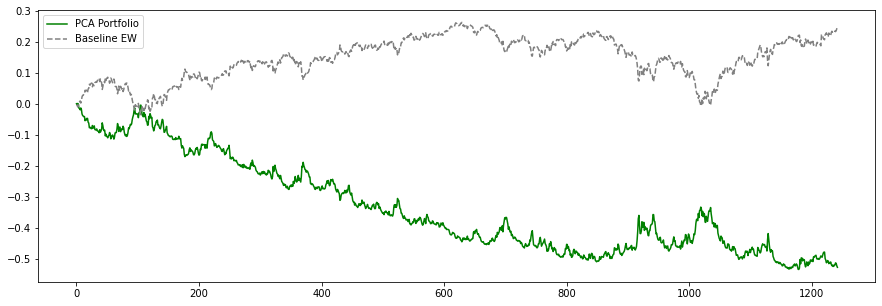

--------------------


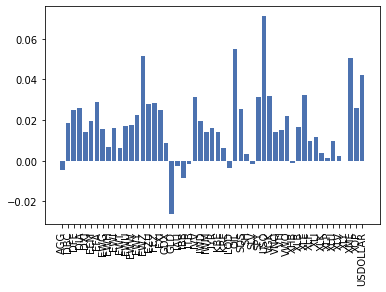

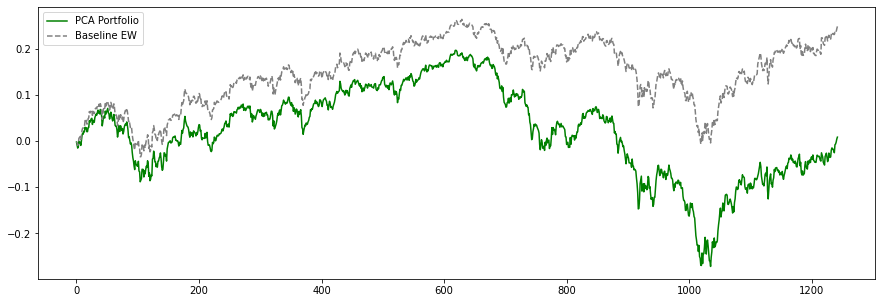

--------------------


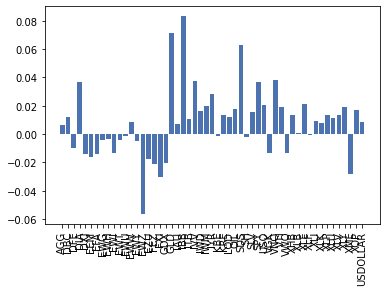

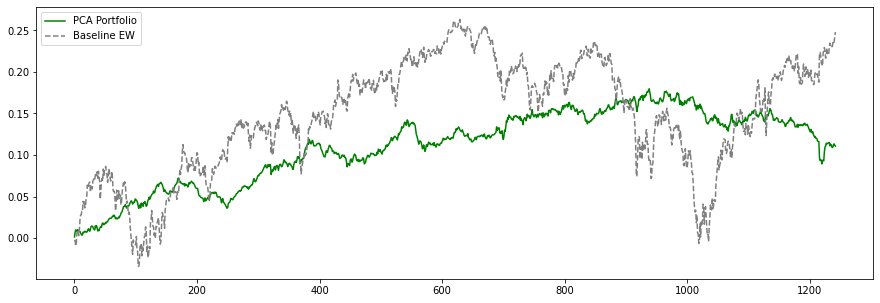

--------------------


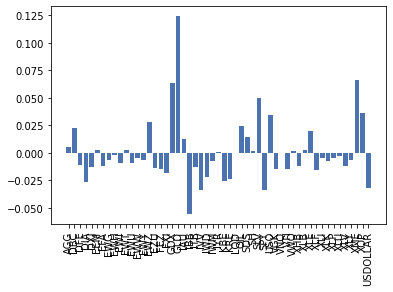

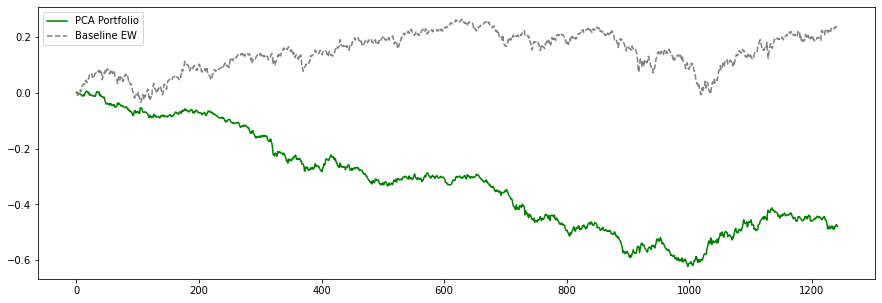

--------------------


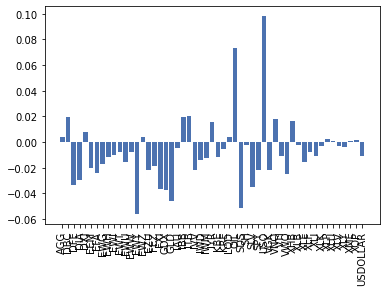

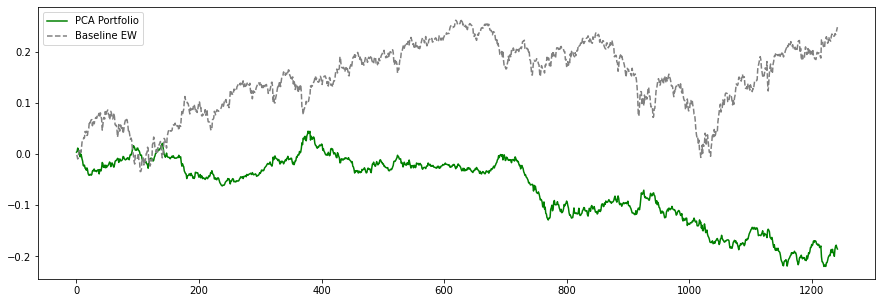

--------------------


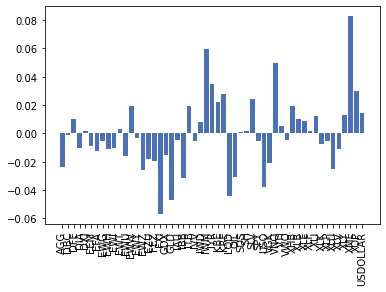

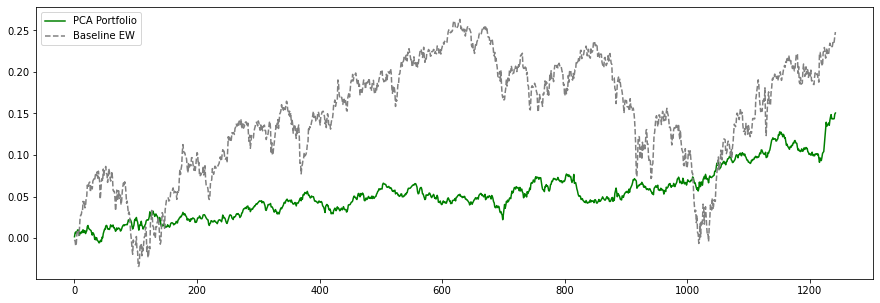

--------------------


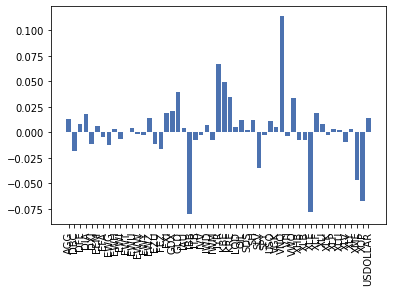

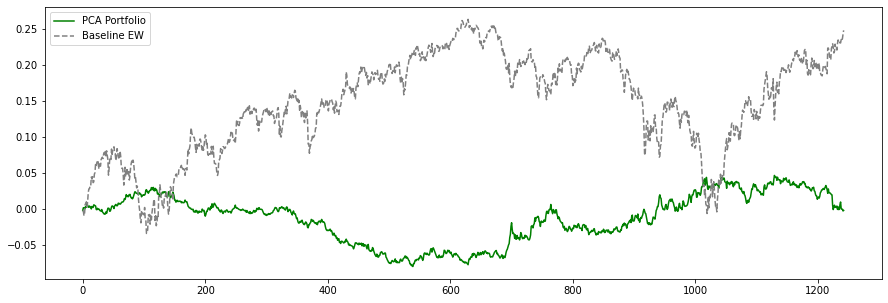

--------------------


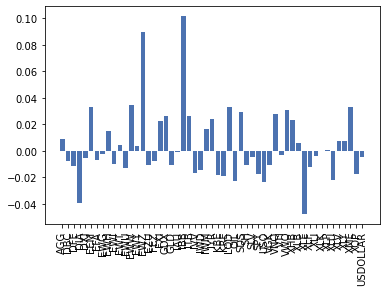

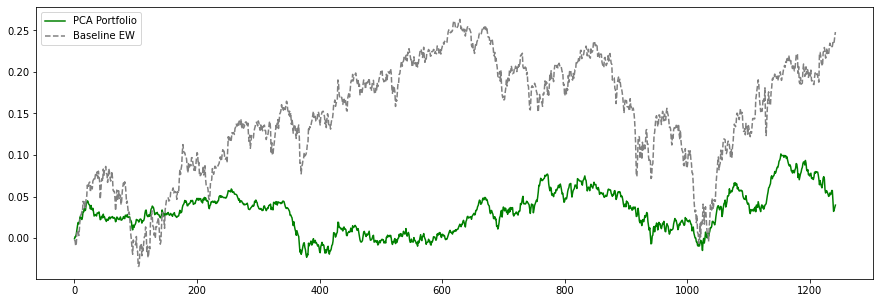

--------------------


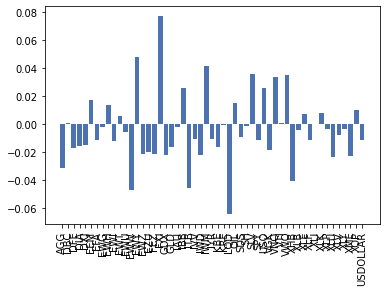

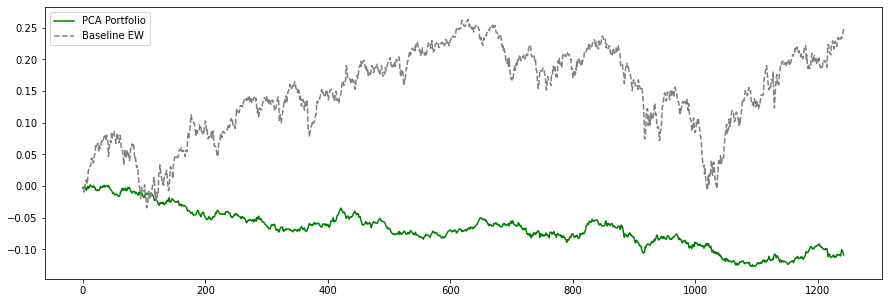

--------------------


In [115]:
for w in pca_portfolios:
    
    pca_test = np.dot(test_df.pct_change(), w)
    
    plt.figure()
    plt.bar(np.arange(n_assets), w)
    plt.xticks(np.arange(n_assets), train_df.columns, rotation='vertical')
    plt.show()
    
    plt.figure(figsize = (15, 5))
    plt.plot(pca_test[1:].cumsum(), label = 'PCA Portfolio', color = 'green')
    plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
    plt.legend()
    plt.show()
    
    print('-' * 20)

# Autoencoder Portfolios

In [116]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.models import load_model

Using TensorFlow backend.


In [117]:
encoding_dim = 10
num_stock = len(train_df.columns)

# connect all layers
input_img = Input(shape=(num_stock, ))
encoded = Dense(encoding_dim * 2, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(encoded)
decoded = Dense(encoding_dim * 2, activation= 'relu')(encoded)
decoded = Dense(num_stock, activation = 'linear')(decoded)

# construct and compile AE model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [118]:
data = train_df.pct_change()[1:]
history = autoencoder.fit(data, data, shuffle=False, epochs=100, batch_size=64)
reconstruct = autoencoder.predict(train_df)

Epoch 1/100
1528/1528 [==============================] - 1s 330us/step - loss: 0.0114
Epoch 2/100
1528/1528 [==============================] - 0s 150us/step - loss: 0.0096
Epoch 3/100
1528/1528 [==============================] - 0s 103us/step - loss: 0.0081
Epoch 4/100
1528/1528 [==============================] - 0s 95us/step - loss: 0.0068
Epoch 5/100
1528/1528 [==============================] - 0s 161us/step - loss: 0.0057
Epoch 6/100
1528/1528 [==============================] - 0s 151us/step - loss: 0.0047
Epoch 7/100
1528/1528 [==============================] - 0s 175us/step - loss: 0.0040
Epoch 8/100
1528/1528 [==============================] - 0s 172us/step - loss: 0.0033
Epoch 9/100
1528/1528 [==============================] - 0s 110us/step - loss: 0.0028
Epoch 10/100
1528/1528 [==============================] - 0s 90us/step - loss: 0.0023
Epoch 11/100
1528/1528 [==============================] - 0s 104us/step - loss: 0.0019
Epoch 12/100
1528/1528 [==============================

1528/1528 [==============================] - 0s 100us/step - loss: 1.1695e-04 0s - loss: 1.3157e-0
Epoch 92/100
1528/1528 [==============================] - 0s 74us/step - loss: 1.1604e-04
Epoch 93/100
1528/1528 [==============================] - 0s 105us/step - loss: 1.1693e-04
Epoch 94/100
1528/1528 [==============================] - 0s 108us/step - loss: 1.1596e-04
Epoch 95/100
1528/1528 [==============================] - 0s 132us/step - loss: 1.1688e-04
Epoch 96/100
1528/1528 [==============================] - 0s 103us/step - loss: 1.1586e-04
Epoch 97/100
1528/1528 [==============================] - 0s 112us/step - loss: 1.1665e-04
Epoch 98/100
1528/1528 [==============================] - 0s 107us/step - loss: 1.1577e-04
Epoch 99/100
1528/1528 [==============================] - 0s 62us/step - loss: 1.1687e-04
Epoch 100/100
1528/1528 [==============================] - 0s 103us/step - loss: 1.1586e-04


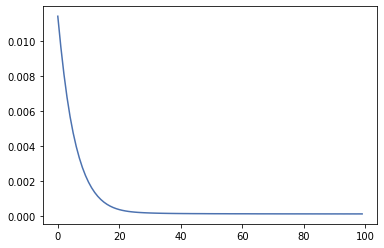

In [119]:
plt.figure()
plt.plot(history.history['loss'])
plt.show()

In [130]:
communal_information = []
for i in range(0, len(train_df.columns)):
    diff = np.linalg.norm((train_df.iloc[:,i] - reconstruct[:,i])) # 2 norm difference
    communal_information.append(float(diff))
communal_information = np.array(communal_information) 

ranking = np.array(communal_information).argsort()
for stock_index in ranking:
    print(stock_index, communal_information[stock_index], train_df.iloc[:,stock_index].name) # print stock name from lowest different to highest

5 262.1200608831792 EEM
45 290.3377011119485 XLK
20 306.7924915769703 IAU
9 367.1104763921856 EWI
11 424.6285081354585 EWU
41 453.5051081045121 XLB
28 456.0651882849011 KRE
47 490.08423164969423 XLU
16 491.25809412838737 FEZ
15 513.2496843093036 EZU
33 562.5513412988951 SLV
27 582.4177887394915 KBE
44 584.5205742410637 XLI
43 594.7216787648625 XLF
13 615.2228739887241 EWY
51 699.7096300683012 XOP
10 730.4247533645079 EWT
12 821.3107106812703 EWW
17 836.3348213602343 FXI
6 840.067231848865 EFA
1 859.1096427872731 DBC
36 868.2235900226144 VGK
48 889.1339214843911 XLV
4 890.3431887330944 DXJ
7 926.1098191125775 EWG
46 948.9891788023558 XLP
8 989.3022746781747 EWH
18 1083.338577218214 GDX
50 1338.192592425268 XME
22 1387.4646239539406 ITB
30 1388.6028143837907 OIL
26 1412.6008669842772 IYR
38 1445.8387525020714 VTI
14 1508.449753714806 EWZ
2 1551.816506083005 DFE
49 1635.6248347349501 XLY
40 1700.7491384349598 XHB
42 1921.066265492743 XLE
35 1978.8833714087573 USO
39 2038.2121901937126 VWO

In [131]:
w = np.array(communal_information) / sum(np.abs(communal_information))
# w = np.array(communal_information**-1) / sum(np.abs(communal_information**-1))

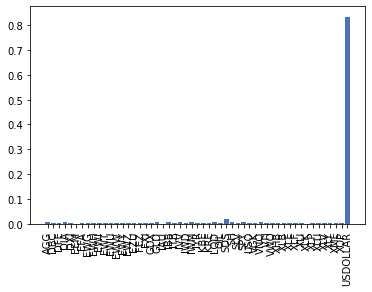

In [132]:
plt.figure()
plt.bar(np.arange(n_assets), w)
plt.xticks(np.arange(n_assets), train_df.columns, rotation='vertical')
plt.show()

In [124]:
ae_test = np.dot(test_df.pct_change(), w)

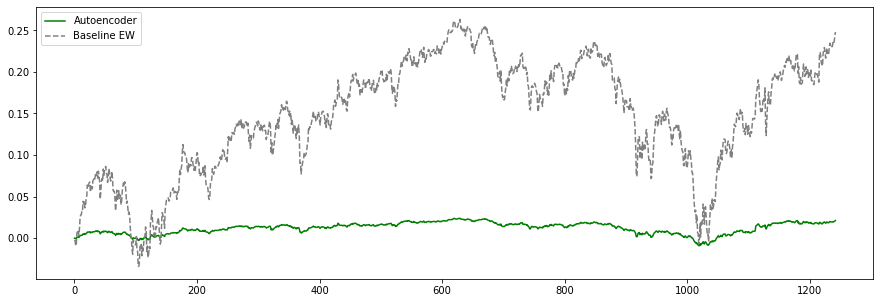

In [125]:
plt.figure(figsize = (15, 5))
plt.plot(ae_test[1:].cumsum(), label = 'Autoencoder', color = 'green')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [126]:
sr_ae = sharpe_ratio(ae_test[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(sr_ae, baseline_sharpe, len(max_sharpe_test[1:]))
ir = information_ratio(ae_test[1:], benchmark=np.mean(equal_allocation_test[1:]), entries_per_year=252)
baseline_sharpe, sr_ae, psr, ir

(0.4139222851872887,
 0.33678362010297225,
 0.004089767897418729,
 -3.6372108969061396)

# PCA vs AE

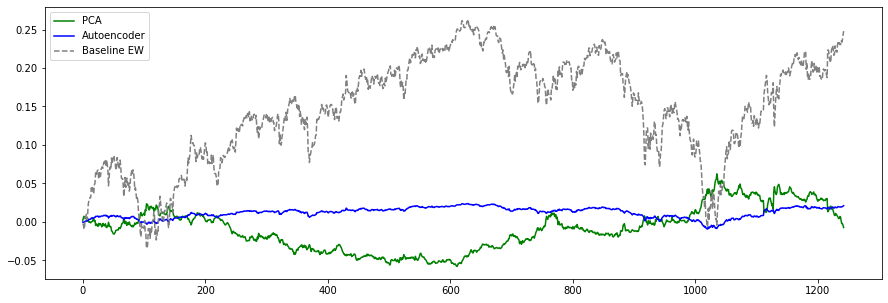

In [127]:
pca_test = np.dot(test_df.pct_change(), pca_portfolios[0])
plt.figure(figsize = (15, 5))
plt.plot(pca_test[1:].cumsum(), label = 'PCA', color = 'green')
plt.plot(ae_test[1:].cumsum(), label = 'Autoencoder', color = 'blue')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [133]:
sharpe_ratio(ae_test[1:], entries_per_year=252)

0.33678362010297225

In [134]:
sharpe_ratio(pca_test[1:], entries_per_year=252)

-0.041129980954109614

# Black-Litterman Portfolio

In [135]:
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt import black_litterman, risk_models

In [136]:
S = CovarianceShrinkage(train_df).ledoit_wolf()
mu = expected_returns.ema_historical_return(train_df) # pseudo-predictions

In [137]:
bl = BlackLittermanModel(S, absolute_views=mu.to_dict())
rets = bl.bl_returns()

/anaconda2/lib/python3.7/site-packages/pypfopt/black_litterman.py:252: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


In [138]:
ef = EfficientFrontier(rets, S, weight_bounds=(-1, 1))
ef.add_objective(objective_functions.L2_reg, gamma=10)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', -0.00412), ('DBC', -0.00407), ('DFE', 0.02292), ('DIA', 0.01901), ('DXJ', 0.01873), ('EEM', 0.02792), ('EFA', 0.02461), ('EWG', 0.02878), ('EWH', 0.02184), ('EWI', 0.02856), ('EWT', 0.01818), ('EWU', 0.02253), ('EWW', 0.03268), ('EWY', 0.02927), ('EWZ', 0.02018), ('EZU', 0.02943), ('FEZ', 0.02997), ('FXI', 0.02963), ('GDX', 0.01063), ('GLD', 0.00307), ('IAU', 0.00345), ('IBB', 0.03264), ('ITB', 0.07569), ('IVV', 0.0217), ('IWD', 0.02382), ('IWM', 0.0324), ('IYR', 0.03396), ('KBE', 0.03648), ('KRE', 0.03839), ('LQD', 0.00203), ('OIL', -0.01141), ('SDS', -0.06763), ('SH', -0.03873), ('SLV', 0.01577), ('SPY', 0.02256), ('USO', -0.01195), ('VGK', 0.02692), ('VNQ', 0.02967), ('VTI', 0.0233), ('VWO', 0.02048), ('XHB', 0.06762), ('XLB', 0.0209), ('XLE', 0.01288), ('XLF', 0.03613), ('XLI', 0.02471), ('XLK', 0.01908), ('XLP', 0.01163), ('XLU', 0.0069), ('XLV', 0.02133), ('XLY', 0.03077), ('XME', 0.02039), ('XOP', 0.01614), ('USDOLLAR', -0.00777)])
Expected annual return: 16

/anaconda2/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:182: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


(0.1630212080671979, 0.37516811094638114, 0.38121898928568165)

In [139]:
w = list(cleaned_weights.values())
w /= sum(np.abs(w))

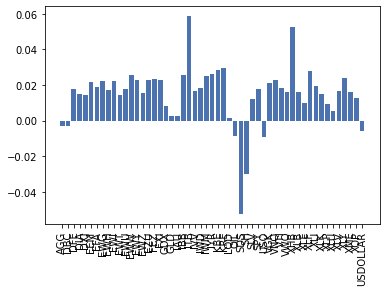

In [140]:
plt.figure()
plt.bar(np.arange(n_assets), w)
plt.xticks(np.arange(n_assets), train_df.columns, rotation='vertical')
plt.show()

In [141]:
bl_test = np.dot(test_df.pct_change(), w)

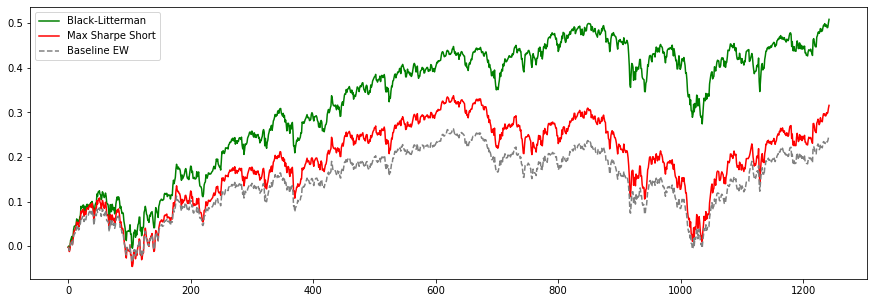

In [142]:
plt.figure(figsize = (15, 5))
plt.plot(bl_test[1:].cumsum(), label = 'Black-Litterman', color = 'green')
plt.plot(max_sharpe_test_fixed[1:].cumsum(), label = 'Max Sharpe Short', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()

In [143]:
sr_bl = sharpe_ratio(bl_test[1:], entries_per_year=252)
psr = probabilistic_sharpe_ratio(sr_bl, msr_short, len(max_sharpe_test[1:]))
ir = information_ratio(bl_test[1:], benchmark=np.mean(max_sharpe_test_short[1:]), entries_per_year=252)
msr_short, sr_bl, psr, ir

(0.4493252395084961,
 0.7007863086474428,
 0.999999999999999,
 0.23129684312684906)

# Playing with multicriteria optimization

In [165]:
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(train_df)
S = CovarianceShrinkage(train_df).ledoit_wolf()

In [166]:
# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

ef.add_objective(objective_functions.L2_reg, gamma=10)

def L1_norm(w, k=1):
    return k * cp.norm(w, 1)

ef.add_objective(L1_norm, k=2)

ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
ef.nonconvex_objective(decorrelate, train_df.corr())
raw_weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.0), ('DBC', 0.01039), ('DFE', 0.01898), ('DIA', 0.01667), ('DXJ', 0.01396), ('EEM', 0.03232), ('EFA', 0.02372), ('EWG', 0.02628), ('EWH', 0.0235), ('EWI', 0.02777), ('EWT', 0.02245), ('EWU', 0.02389), ('EWW', 0.02568), ('EWY', 0.03087), ('EWZ', 0.03411), ('EZU', 0.02738), ('FEZ', 0.028), ('FXI', 0.03289), ('GDX', 0.02025), ('GLD', 0.00151), ('IAU', 0.00135), ('IBB', 0.01354), ('ITB', 0.02911), ('IVV', 0.01854), ('IWD', 0.02028), ('IWM', 0.02317), ('IYR', 0.02972), ('KBE', 0.03181), ('KRE', 0.02751), ('LQD', 0.0), ('OIL', 0.01803), ('SDS', -0.03923), ('SH', -0.01856), ('SLV', 0.01149), ('SPY', 0.019), ('USO', 0.01766), ('VGK', 0.02546), ('VNQ', 0.02601), ('VTI', 0.0192), ('VWO', 0.02282), ('XHB', 0.02654), ('XLB', 0.0235), ('XLE', 0.02647), ('XLF', 0.0315), ('XLI', 0.01945), ('XLK', 0.01721), ('XLP', 0.00777), ('XLU', 0.01146), ('XLV', 0.01036), ('XLY', 0.01881), ('XME', 0.03762), ('XOP', 0.03179), ('USDOLLAR', 0.0)])
Expected annual return: 5.8%
Annual volatility

/anaconda2/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:182: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


(0.057562145054870464, 0.336687232723236, 0.11156391274791028)

In [167]:
w = list(cleaned_weights.values())
w /= sum(np.abs(w))

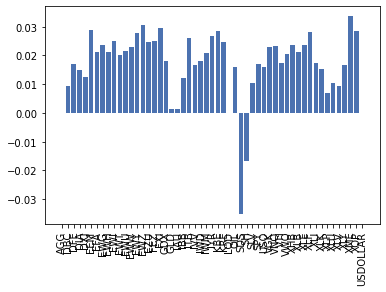

In [168]:
plt.figure()
plt.bar(np.arange(n_assets), w)
plt.xticks(np.arange(n_assets), train_df.columns, rotation='vertical')
plt.show()

In [169]:
obj_test = np.dot(test_df.pct_change(), w)

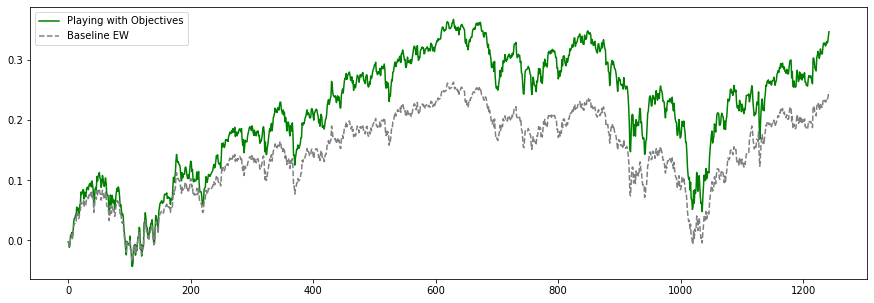

In [170]:
plt.figure(figsize = (15, 5))
plt.plot(obj_test[1:].cumsum(), label = 'Playing with Objectives', color = 'green')
# plt.plot(max_sharpe_test_fixed[1:].cumsum(), label = 'Max Sharpe Short', color = 'red')
plt.plot(equal_allocation_test[1:].cumsum(), color = 'grey', ls = '--', label = 'Baseline EW')
plt.legend()
plt.show()